# 중고차 가격 예측

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 데이터를 학습용과 테스트용으로 분리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 평균 제곱 오차 계산
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Noto Sans KR'
rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
dt = pd.read_csv('data3/Dubizzle_used_car_sales.csv')



In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   int64  
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

# 중고차 테이블 컬럼 설명

<details>
<summary>컬럼 소개 </summary>

| 컬럼명                    | 의미                                      |
| ---------------------- | --------------------------------------- |
| `title`                | 차량 전체 명칭 (제조사 + 모델 + 트림 등)              |
| `price_in_aed` **target**   | 차량 가격 (단위: UAE 디르함 AED)                 |
| `kilometers`           | 주행 거리 (단위: km)                          |
| `body_condition`       | 외관 상태 설명 (예: Perfect inside and out)    |
| `mechanical_condition` | 기계적 상태 설명 (예: Perfect inside and out)   |
| `seller_type`          | 판매자 유형 (예: Dealer, Owner 등)             |
| `body_type`            | 차량 차종 (예: SUV, Sedan 등)                 |
| `no_of_cylinders`      | 엔진 실린더 개수                               |
| `transmission_type`    | 변속기 종류 (예: Automatic Transmission)      |
| `regional_specs`       | 지역 사양 (예: GCC 사양, 미국 사양 등)              |
| `horsepower`           | 마력 (예: 400 - 500 HP, 또는 Unknown)        |
| `fuel_type`            | 연료 종류 (예: Gasoline, Diesel 등)           |
| `steering_side`        | 운전석 위치 (예: Left Hand Side)              |
| `year`                 | 차량 연식                                   |
| `color`                | 차량 색상                                   |
| `emirate`              | 차량이 등록된 아랍에미리트 지역 (예: Dubai, Sharjah 등) |
| `motors_trim`          | 트림명 또는 세부 사양 (예: GLS, E 300 등)          |
| `company`              | 제조사명 (예: mitsubishi, mercedes-benz 등)   |
| `model`                | 차량 모델명 (예: pajero, e-class 등)           |
| `date_posted`          | 매물 등록 날짜                                |

</details>

In [4]:
sorted(dt['body_condition'].unique())

['A bit of wear & tear, all repaired',
 'No accidents, very few faults',
 'Normal wear & tear, a few issues',
 'Perfect inside and out']

In [5]:
sorted(dt['mechanical_condition'].unique())

['Major faults fixed, small remain',
 'Major faults, all fixed',
 'Minor faults, all fixed',
 'Ongoing minor & major faults',
 'Perfect inside and out']

In [6]:
dt.head(4)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   int64  
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

총데이터수 9970

**Null 값**    
    - 차량 전체 명칭 5개   
    - 엔진 실린더 개수 81개   
    - 차량연식 970개   
    - 트림명 28개   
 

| 컬럼명                    | 의미                                      |
| ---------------------- | --------------------------------------- |
| `title` 분류               | 차량 전체 명칭 (제조사 + 모델 + 트림 등)              |
| `price_in_aed` **target**   | 차량 가격 (단위: UAE 디르함 AED)                 |
| `kilometers` 수치          | 주행 거리 (단위: km)                          |
| `body_condition` 인코딩 필요       | 외관 상태 설명 (예: Perfect inside and out)    |
| `mechanical_condition` 인코딩 필요 | 기계적 상태 설명 (예: Perfect inside and out)   |
| `seller_type` 인코딩 필요         | 판매자 유형 (예: Dealer, Owner 등)             |
| `body_type`   인코딩 필요         | 차량 차종 (예: SUV, Sedan 등)                 |
| `no_of_cylinders` 수치     | 엔진 실린더 개수                               |
| `transmission_type`  인코딩필요  | 변속기 종류 (예: Automatic Transmission)      |
| `regional_specs`       | 지역 사양 (예: GCC 사양, 미국 사양 등)              |
| `horsepower`           | 마력 (예: 400 - 500 HP, 또는 Unknown)        |
| `fuel_type`            | 연료 종류 (예: Gasoline, Diesel 등)           |
| `steering_side`    인코딩 필요    | 운전석 위치 (예: Left Hand Side)              |
| `year`   수치형              | 차량 연식                                   |
| `color`                | 차량 색상                                   |
| `emirate`              | 차량이 등록된 아랍에미리트 지역 (예: Dubai, Sharjah 등) |
| `motors_trim`          | 트림명 또는 세부 사양 (예: GLS, E 300 등)          |
| `company`              | 제조사명 (예: mitsubishi, mercedes-benz 등)   |
| `model`                | 차량 모델명 (예: pajero, e-class 등)           |
| `date_posted`          | 매물 등록 날짜                                |

# 이상치값 시각화

In [19]:
# 수치형 변수만 추출
li = dt.select_dtypes(include=['number']).columns.tolist()
li

li_name = {
    'price_in_aed' : '차량가격',
    'kilometers' : '주행거리',
    'year' : '연식'
}

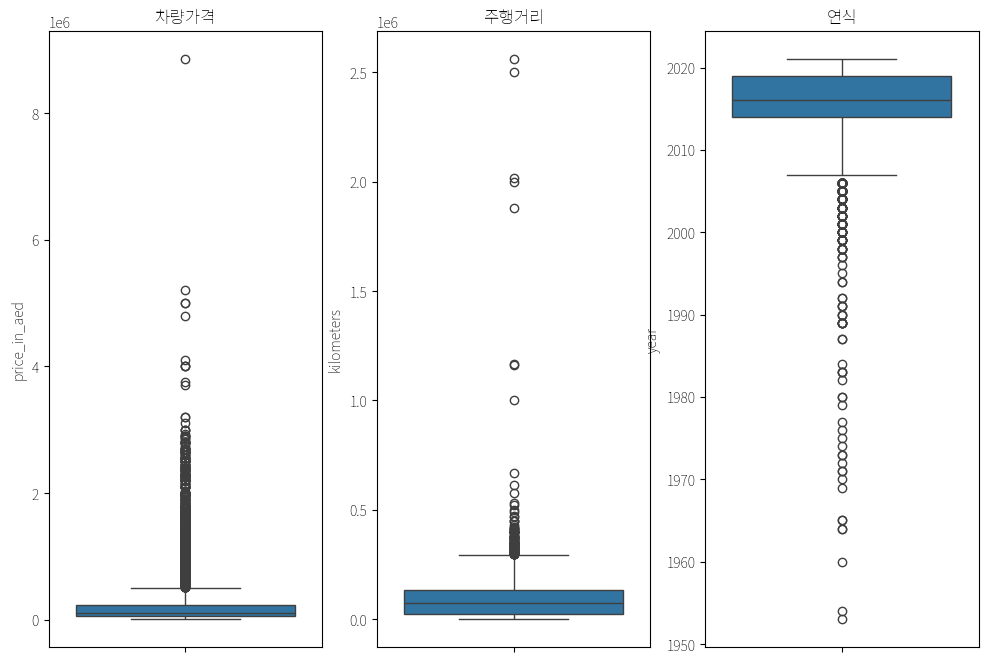

In [20]:
plt.figure(figsize=(12,8))

for i, col in enumerate(li,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=dt[col])
    plt.title(f'{li_name[col]}',fontsize =12)
    
plt.tight_layout
plt.show()

**차량가격
**주행거리** : 1억 2천만 Km는 현실적으로 불가능한 주행거리 삭제가 필요 

In [16]:
# sorted(dt['price_in_aed'].unique(),reverse=True)
sorted(dt['kilometers'].unique(),reverse=True)

[np.int64(115000000),
 np.int64(2559000),
 np.int64(2500000),
 np.int64(2015652),
 np.int64(2000000),
 np.int64(1880000),
 np.int64(1165887),
 np.int64(1160000),
 np.int64(1000000),
 np.int64(666666),
 np.int64(612388),
 np.int64(579000),
 np.int64(530000),
 np.int64(520000),
 np.int64(500000),
 np.int64(488735),
 np.int64(470000),
 np.int64(465172),
 np.int64(451000),
 np.int64(450000),
 np.int64(449968),
 np.int64(430000),
 np.int64(421831),
 np.int64(419063),
 np.int64(416027),
 np.int64(412000),
 np.int64(411918),
 np.int64(410052),
 np.int64(409000),
 np.int64(400000),
 np.int64(399000),
 np.int64(390000),
 np.int64(380000),
 np.int64(379000),
 np.int64(378050),
 np.int64(375000),
 np.int64(372488),
 np.int64(371537),
 np.int64(370865),
 np.int64(370000),
 np.int64(368000),
 np.int64(362450),
 np.int64(361000),
 np.int64(360000),
 np.int64(357000),
 np.int64(356250),
 np.int64(350000),
 np.int64(348000),
 np.int64(343590),
 np.int64(340000),
 np.int64(339000),
 np.int64(335000),
 

In [ ]:
dt = dt[dt['price_in_aed'] < 8000000]  # 너무 비싼 가격의 차량은 제거 


In [17]:
dt = dt[dt['kilometers'] < 10000000]  # 예: 100만 km 이상은 제거


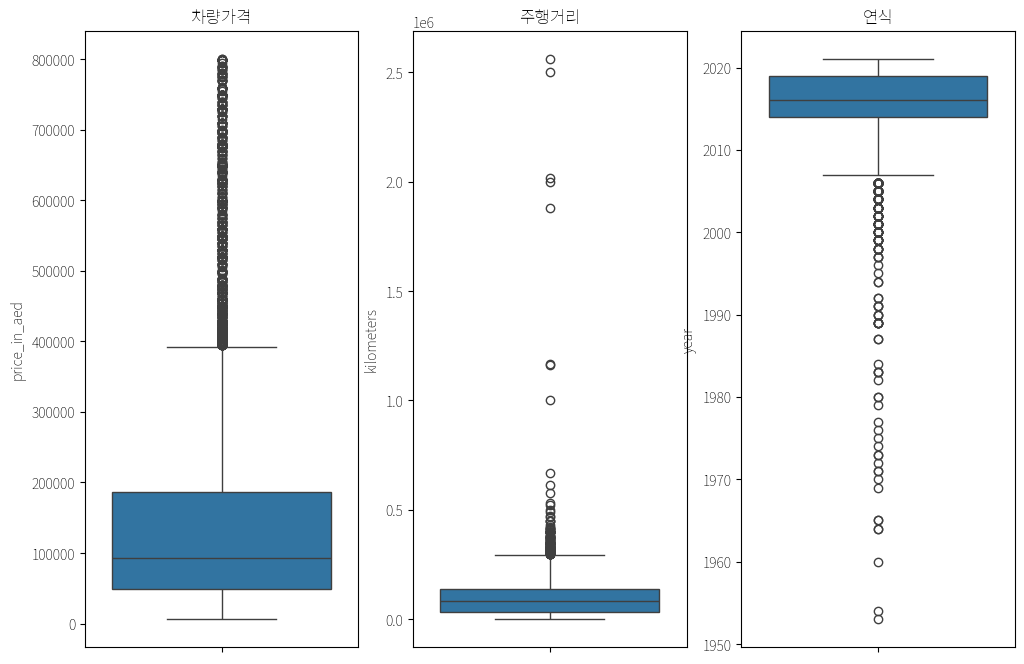

In [25]:
# 이상치 제거 후

plt.figure(figsize=(12,8))

for i, col in enumerate(li,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=dt[col])
    plt.title(f'{li_name[col]}',fontsize =12)
    
plt.tight_layout
plt.show()